**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1 style="font-family: 'Montserrat', sans-serif; color: #34495e; border-bottom: 2px solid #3498db; padding-bottom: 10px;">
  <span style="font-weight: 300;">Data Science Pipeline:</span>
  <br>
  <span style="font-weight: 600;">Leveraging Machine Learning for Precise Housing Price Prediction</span>
</h1>

## Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump, load

## Load and Explore Dataset

In [4]:
df = pd.read_csv("./BostonHousing.csv")

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# dataset information (types, missing values, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data Exploration and Visualization

In [7]:
df['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [8]:
df['rad'].value_counts()

rad
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

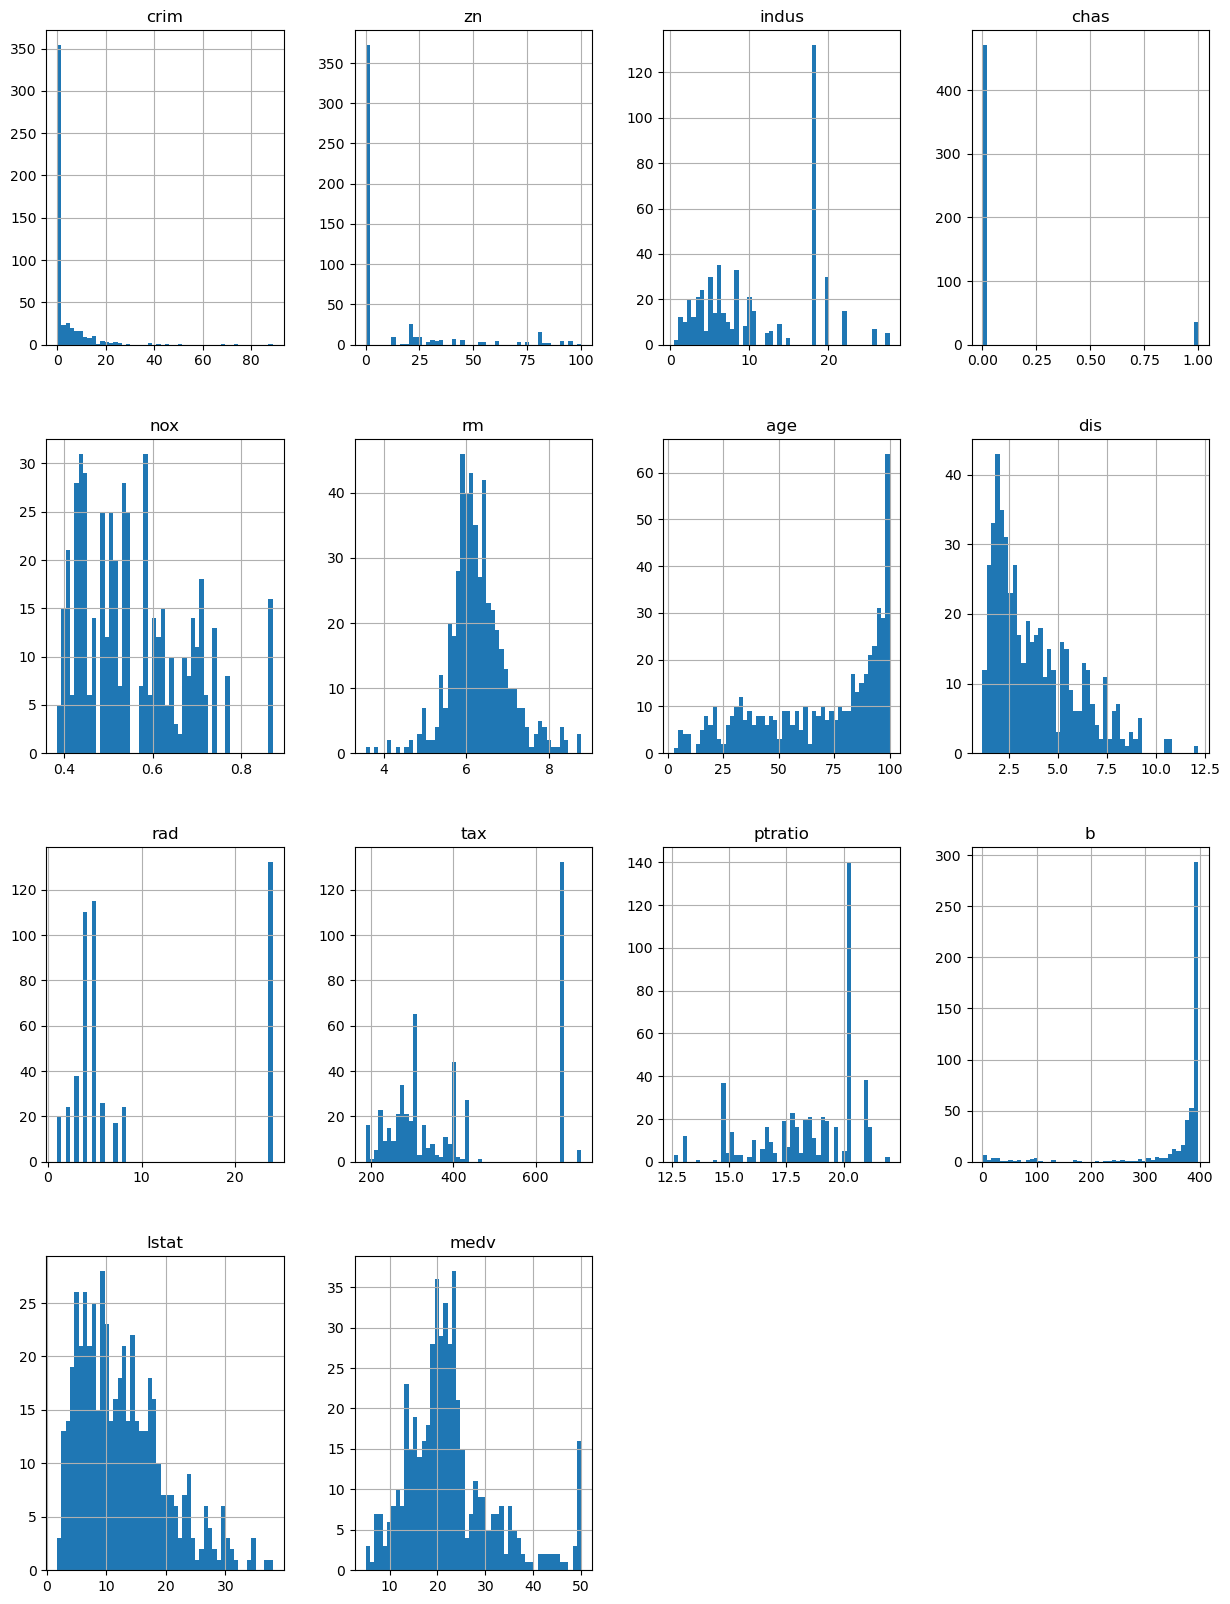

In [13]:
# Histogram of features
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(15,20))
plt.show

In [14]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [16]:
train_set,test_set = split_train_test(df,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [17]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [19]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [23]:
# Stratified Sampling by CHAS Feature
# Stratifed split to ensure 'chas' variable distribution in both train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df,df['chas']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [25]:
strat_train_set.shape

(404, 14)

In [26]:
strat_test_set.shape

(102, 14)

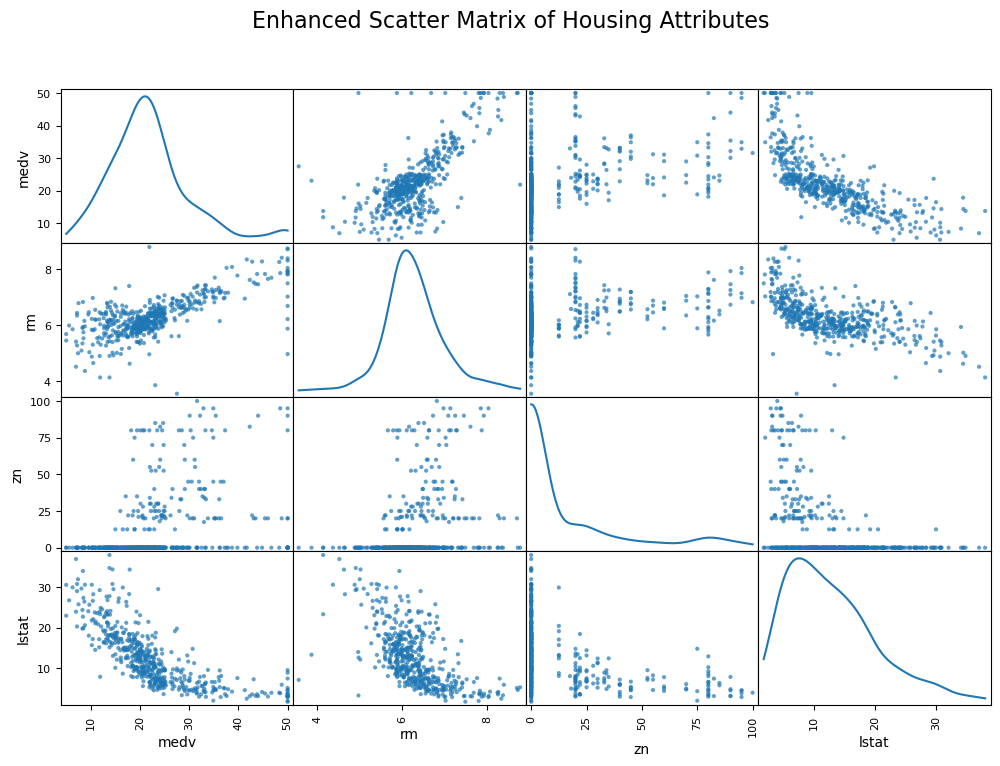

In [31]:
# Advanced scatter matrix with customizations and adds a correlation heatmap for better analysis.
from pandas.plotting import scatter_matrix

attributes = ["medv", "rm", "zn", "lstat"]

# Plotting an enhanced scatter matrix without the color argument
scatter_matrix(df[attributes], figsize=(12, 8), diagonal='kde', alpha=0.7, hist_kwds={'bins': 20})

plt.suptitle("Enhanced Scatter Matrix of Housing Attributes", size=16)

plt.show()


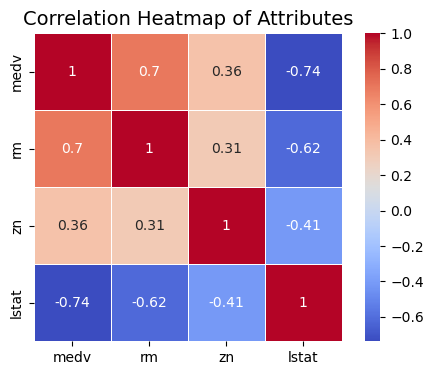

In [32]:
# correlation matrix for key attributes
corr_matrix = df[attributes].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Attributes", size=14)
plt.show()

**Based on the result, we need to try combining or deleting some features for improving model performance and reducing multicollinearity.When features are highly correlated, they can introduce redundancy into the model, leading to overfitting or inflated coefficients in linear models. By combining features (through dimensionality reduction techniques like PCA) or removing less informative features, we can simplify the model, improve interpretability, and enhance its generalization capability on unseen data.**

#### Feature engineering: Create a new feature based on existing ones

In [33]:
df["taxrm"] = df["tax"]/df["rm"]

In [34]:
df['taxrm']

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: taxrm, Length: 506, dtype: float64

In [35]:
corr_matrix = df.corr()

In [36]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.696169
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
taxrm     -0.540380
lstat     -0.737663
Name: medv, dtype: float64

**Scatter plot of the new feature against target variable**

<Axes: xlabel='taxrm', ylabel='medv'>

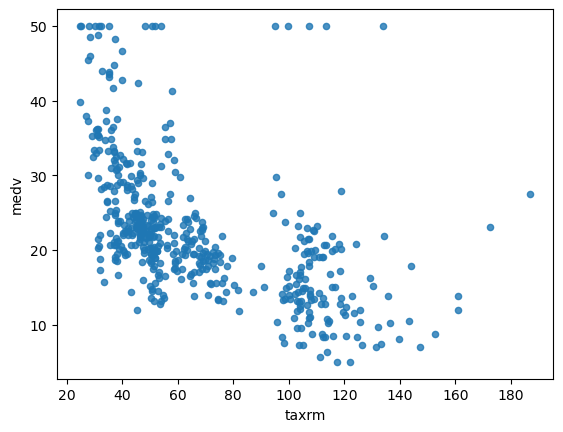

In [37]:
df.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8)

## Splitting the Dataset

**Drop the target variable from training data**

In [38]:
train_df = strat_train_set.drop(["medv"],axis=1)
train_df_labels = strat_train_set["medv"].copy()

In [103]:
# Test set
X_test = strat_test_set.drop(columns="medv")
y_test = strat_test_set["medv"].copy()

## Data Preprocessing Pipeline
**Creating a data preprocessing pipeline**

In [104]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [106]:
train_df_prepared = num_pipeline.fit_transform(train_df)

## Model Selection and Training
**Model 1: RandomForestRegressor**

In [107]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_df_prepared, train_df_labels)

RandomForestRegressor(random_state=42)

## **Model Evaluation**
**Predictions on training set**

In [108]:
train_preds = forest_reg.predict(train_df_prepared)
forest_mse = mean_squared_error(train_df_labels, train_preds)
forest_rmse = np.sqrt(forest_mse)
print(f"Random forest RMSE on training Data: {forest_rmse}")

Random forest RMSE on training Data: 1.3141480318080414


**Cross-validation**

In [109]:
forest_scores = cross_val_score(forest_reg, train_df_prepared , train_df_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [110]:
def pprint_scores(scores):
    print("scores : ",scores)
    print()
    print("Mean : ",scores.mean())    
    print()
    print("Standard Deviation : ",scores.std())

In [111]:
pprint_scores(forest_rmse_scores)

scores :  [2.83141913 2.99093131 4.36612796 2.62063719 3.65406144 2.72507317
 5.0706064  3.27746967 3.22002792 3.44604062]

Mean :  3.420239480539305

Standard Deviation :  0.734020245345652


**Hyperparameters Tuning using GridSearchCV**

In [112]:
param_grid = [
    {'n_estimators': [100, 200, 300], 'max_features': [6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [200, 300], 'max_features': [8, 10]},
]

In [113]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_df_prepared, train_df_labels)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_features': 8, 'n_estimators': 200}


## Final Model Evaluation on Test Set

In [114]:
final_model = grid_search.best_estimator_

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"final Model RMSE on Test Data: {final_rmse}")

final Model RMSE on Test Data: 2.8757730175605625


## Saving the Model


In [115]:
dump(final_model, "final_random_forest_model.joblib")

['final_random_forest_model.joblib']

## Loading the Model and predicting on new data

In [116]:
loaded_model = load("final_random_forest_model.joblib")
sample_feature = np.array([[-0.5, 3.2, -1.3, -0.3, -1.0, 0.5, -1.4, 2.1, -0.6, -0.7, -0.6, 0.4, -0.9]])

loaded_model.predict(sample_feature)

array([25.4695])

## Feature Importance

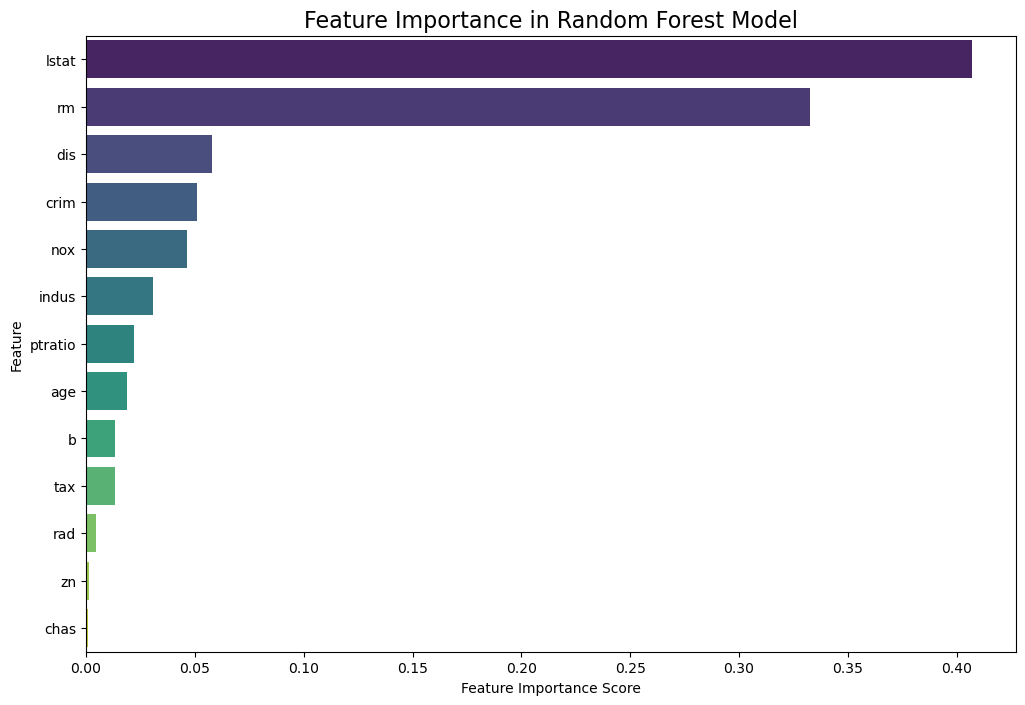

In [117]:
# Random Forest provides a feature_importances_ attribute that allows us to identify the most important features for prediction.

importances = final_model.feature_importances_

# Get the feature names from the original data  
feature_names = train_df.columns

# Sort the feautre feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances

plt.figure(figsize=(12,8))
plt.title("Feature Importance in Random Forest Model", size=16)
sns.barplot(x=importances[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

## Model comparison

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [121]:
#Train and evaluate each model
results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
        ("model", model)
    ])
    pipeline.fit(train_df, train_df_labels)
    
    # Cross-validation
    scores = cross_val_score(pipeline, train_df, train_df_labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    results[model_name] = rmse_scores
    
# Print results
for model_name, rmse_scores in results.items():
    print(f"\n{model_name}:")
    pprint_scores(rmse_scores)


Random Forest:
scores :  [2.82814864 3.00006397 4.36592451 2.59518723 3.65793736 2.73115066
 5.08247292 3.27245487 3.22004739 3.45908913]

Mean :  3.421247666344123

Standard Deviation :  0.7389134187115286

Linear Regression:
scores :  [4.22280104 4.26432882 5.09435035 3.83082263 5.37678858 4.41156459
 7.47247918 5.48563428 4.14602628 6.07178146]

Mean :  5.037657722402158

Standard Deviation :  1.0593466572219608

Gradient Boosting:
scores :  [2.96437502 2.77956613 4.77800767 2.27992533 2.95251769 2.6962236
 3.72047954 3.52019987 2.76323958 2.34755353]

Mean :  3.0802087952385158

Standard Deviation :  0.7093179670190574


## SHAP - Interpretation using SHAP

In [123]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   --------------- ------------------------ 174.1/456.1 kB 2.1 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/456.1 kB 2.2 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.1 kB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.1 kB 2.4 MB/s eta 0:00:01
   -------------------------------------- - 440.3/456.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.6 MB/s eta 0:00:00


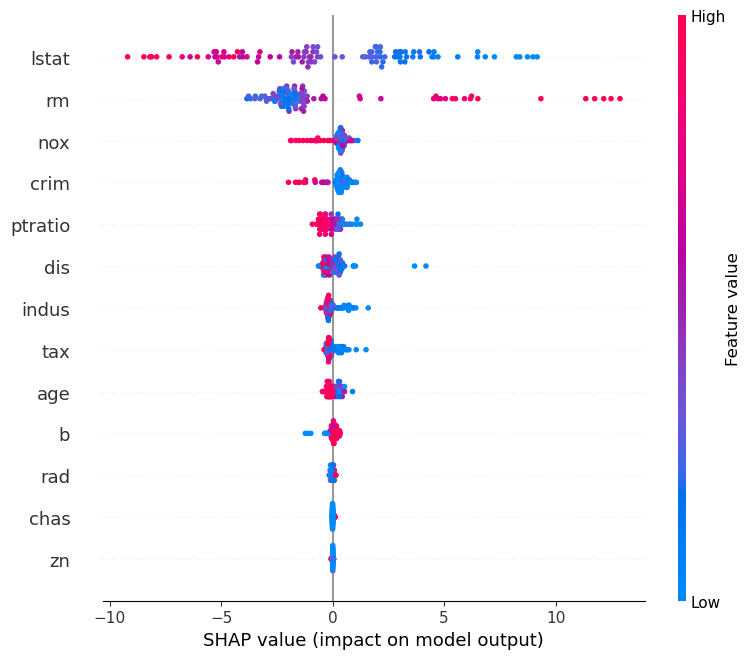

In [124]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_prepared)

# Summary plot
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test_prepared, feature_names=train_df.columns)


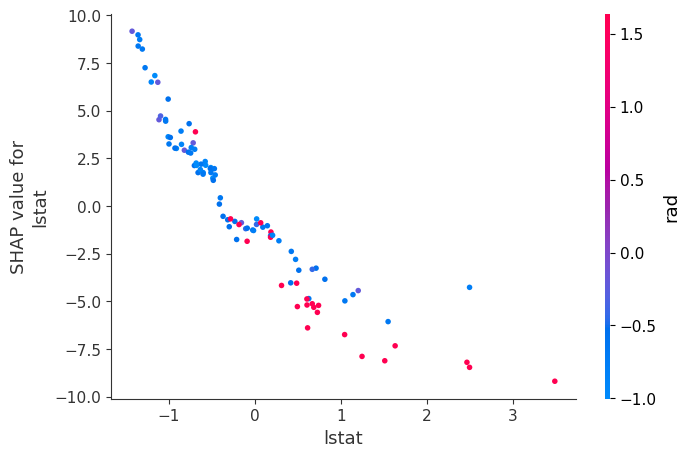

In [125]:
shap.dependence_plot(np.argmax(importances), shap_values, X_test_prepared, feature_names=train_df.columns)

## Partial Dependence Plot (PDP)

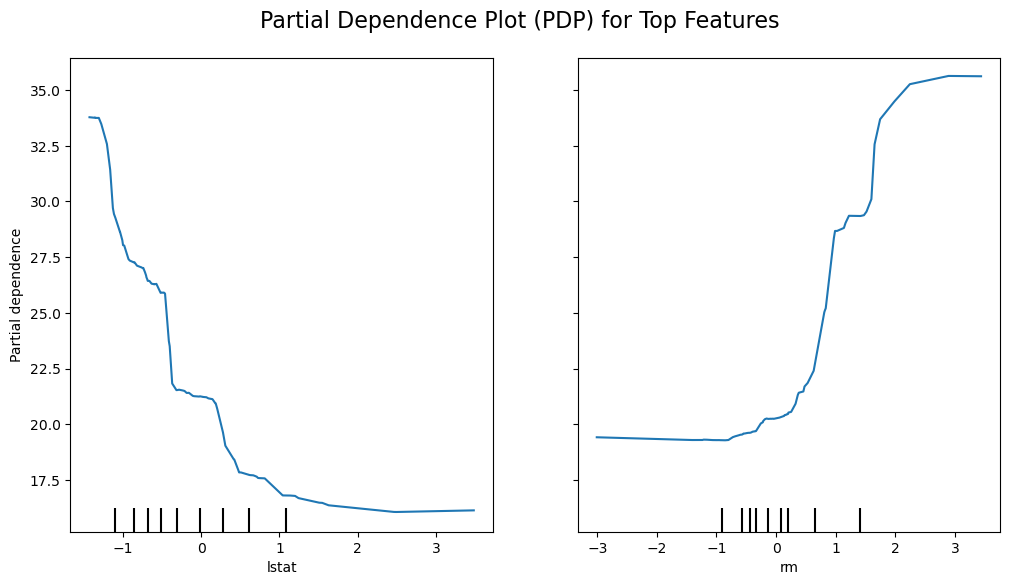

In [127]:
from sklearn.inspection import PartialDependenceDisplay

# PDP for the top 2 most important features
features_to_plot = [sorted_indices[0], sorted_indices[1]]  # Top 2 important features

# Plot Partial Dependence using the new PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(final_model, X_test_prepared, features_to_plot, feature_names=train_df.columns, ax=ax)
plt.suptitle('Partial Dependence Plot (PDP) for Top Features', size=16)
plt.subplots_adjust(top=0.9)
plt.show()

## Residual Analysis

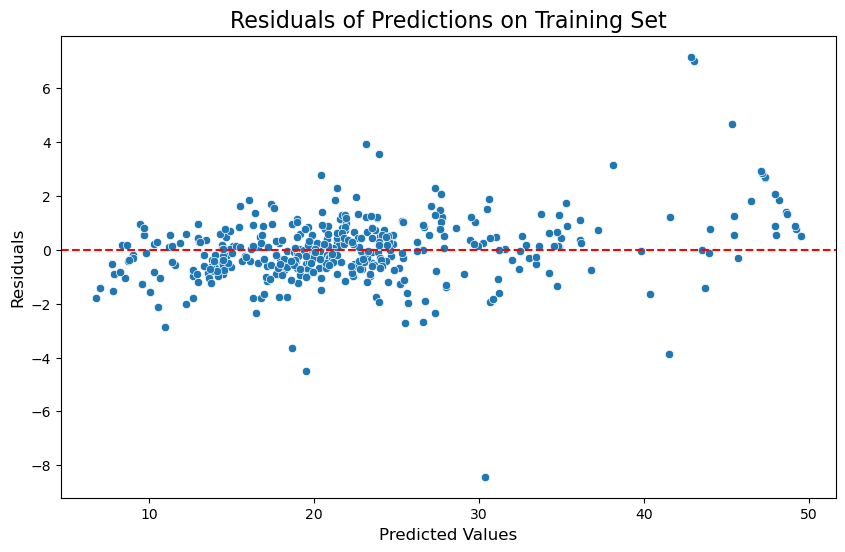

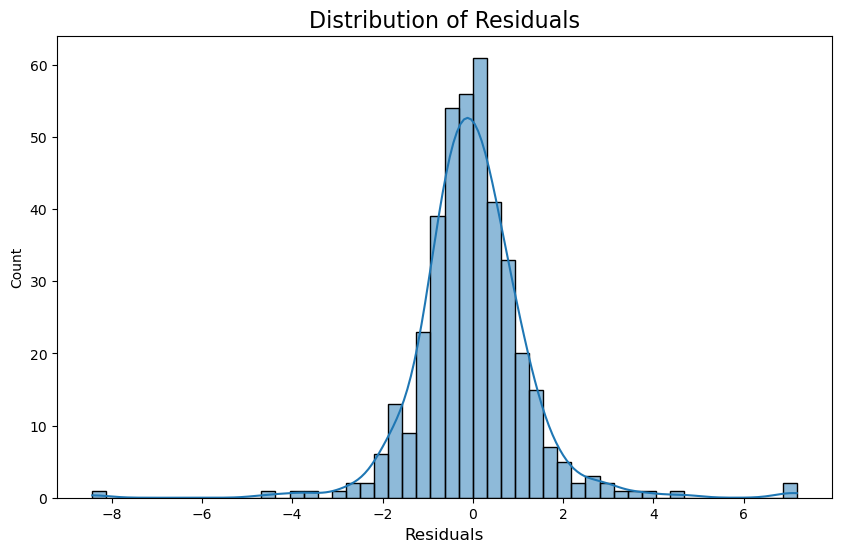

In [128]:
y_train_pred = final_model.predict(num_pipeline.transform(train_df))

# Residuals: Difference between actual and predicted values
residuals = train_df_labels - y_train_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals of Predictions on Training Set', size=16)
plt.xlabel('Predicted Values', size=12)
plt.ylabel('Residuals', size=12)
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals', size=16)
plt.xlabel('Residuals', size=12)
plt.show()

In [129]:
# ## Export Final Predictions to CSV
final_predictions_df = pd.DataFrame(data={
    'Actual': y_test,
    'Predicted': final_predictions
})

final_predictions_df.to_csv("final_predictions.csv", index=False)
print("Final predictions exported to 'final_predictions.csv'.")


Final predictions exported to 'final_predictions.csv'.


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**